# Lab 3

1. Train 4 classifiers to predict the biologocal response from "bioresponse.csv" dataset:
    - shallow decision tree;
    - deep decision tree;
    - random forest on shallow trees;
    - random forest on deep trees;
2. Evaluate the following metrics to check the performance of your models:
    - accuracy;
    - precision;
    - recall;
    - F1-score;
    - log-loss;
3. Plot precision-recall and ROC-AUC curves for your models.
4. Train the classifier that avoids FN errors in prediciting biological response and evaluate metrics for it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

warnings.simplefilter('ignore')

RANDOM_STATE = 42

# Task 1

In [2]:
data = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(3751, 1777)

In [5]:
data['Activity'].value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

In [6]:
X = data.drop('Activity', axis = 1)
y = data['Activity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = RANDOM_STATE)

### Make predictions

In [8]:
sdtc =  DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
sdtc.fit(X_train, y_train)
sdtc_predict = sdtc.predict(X_test)
sdtc_predict_proba = sdtc.predict_proba(X_test)[:,1]

In [9]:
ddtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
ddtc.fit(X_train, y_train)
ddtc_predict = ddtc.predict(X_test)
ddtc_predict_proba = ddtc.predict_proba(X_test)[:,1]

In [10]:
srfc = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=RANDOM_STATE)
srfc.fit(X_train, y_train)
srfc_predict = srfc.predict(X_test)
srfc_predict_proba = srfc.predict_proba(X_test)[:,1]

In [11]:
drfc = RandomForestClassifier(n_estimators = 50,random_state=RANDOM_STATE)
drfc.fit(X_train, y_train)
drfc_predict = drfc.predict(X_test)
drfc_predict_proba = drfc.predict_proba(X_test)[:,1]

# Task 2

In [12]:
def get_metrics(y_ans, y_pred):
    acc = accuracy_score(y_ans, y_pred)
    prec = precision_score(y_ans, y_pred)
    rec = recall_score(y_ans, y_pred)
    f1 = f1_score(y_ans, y_pred)
    ll = log_loss(y_ans, y_pred)
    return acc, prec, rec, f1, ll

### Metrics for shallow decision tree

In [13]:
sdtc_acc, sdtc_prec, sdtc_rec, sdtc_f1, sdtc_ll = get_metrics(y_test, sdtc_predict)
print(f'Accuracy: {sdtc_acc}\nPrecision: {sdtc_prec}\nRecall: {sdtc_rec}\nF1-score: {sdtc_f1}\nLog-loss: {sdtc_ll}')

Accuracy: 0.7479806138933764
Precision: 0.780559646539028
Recall: 0.7647907647907648
F1-score: 0.7725947521865889
Log-loss: 8.704537459797441


### Metrics for deep decision tree

In [14]:
ddtc_acc, ddtc_prec, ddtc_rec, ddtc_f1, ddtc_ll = get_metrics(y_test, ddtc_predict)
print(f'Accuracy: {ddtc_acc}\nPrecision: {ddtc_prec}\nRecall: {ddtc_rec}\nF1-score: {ddtc_f1}\nLog-loss: {ddtc_ll}')

Accuracy: 0.7051696284329564
Precision: 0.7546583850931677
Recall: 0.7012987012987013
F1-score: 0.7270007479431564
Log-loss: 10.18318232676605


### Metrics for shallow random forest

In [15]:
srfc_acc, srfc_prec, srfc_rec, srfc_f1, srfc_ll = get_metrics(y_test, srfc_predict)
print(f'Accuracy: {srfc_acc}\nPrecision: {srfc_prec}\nRecall: {srfc_rec}\nF1-score: {srfc_f1}\nLog-loss: {srfc_ll}')

Accuracy: 0.7003231017770598
Precision: 0.714095744680851
Recall: 0.7748917748917749
F1-score: 0.7432525951557094
Log-loss: 10.350612242293503


### Metrics for deep random forest

In [16]:
drfc_acc, drfc_prec, drfc_rec, drfc_f1, drfc_ll = get_metrics(y_test, drfc_predict)
print(f'Accuracy: {drfc_acc}\nPrecision: {drfc_prec}\nRecall: {drfc_rec}\nF1-score: {drfc_f1}\nLog-loss: {drfc_ll}')

Accuracy: 0.7835218093699515
Precision: 0.8244274809160306
Recall: 0.7792207792207793
F1-score: 0.8011869436201782
Log-loss: 7.4769660965594


# Task 3

### Plots for shallow decision tree

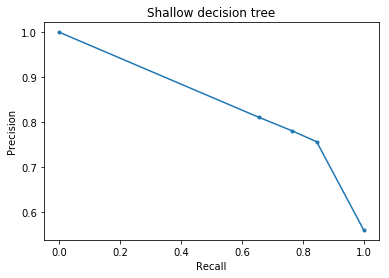

In [17]:
sdtc_prec_curve, sdtc_rec_curve, _ = precision_recall_curve(y_test, sdtc_predict_proba)
plt.plot(sdtc_rec_curve, sdtc_prec_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Shallow decision tree')
plt.show()

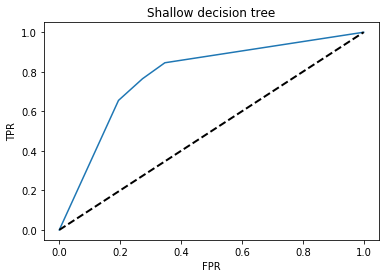

In [18]:
sdtc_fpr, sdtc_tpr, _ = roc_curve(y_test, sdtc_predict_proba)
plt.plot(sdtc_fpr, sdtc_tpr)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Shallow decision tree')
plt.show()

### Plots for deep decision tree

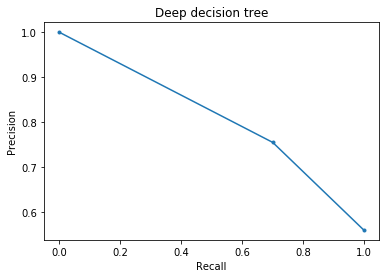

In [19]:
ddtc_prec_curve, ddtc_rec_curve, _ = precision_recall_curve(y_test, ddtc_predict_proba)
plt.plot(ddtc_rec_curve, ddtc_prec_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Deep decision tree')
plt.show()

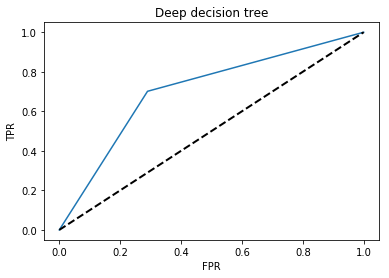

In [20]:
ddtc_fpr, ddtc_tpr, _ = roc_curve(y_test, ddtc_predict_proba)
plt.plot(ddtc_fpr, ddtc_tpr)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Deep decision tree')
plt.show()

### Plots for shallow random forest

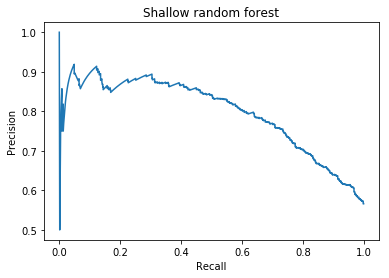

In [21]:
srfc_prec_curve, srfc_rec_curve, _ = precision_recall_curve(y_test, srfc_predict_proba)
plt.plot(srfc_rec_curve, srfc_prec_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Shallow random forest')
plt.show()

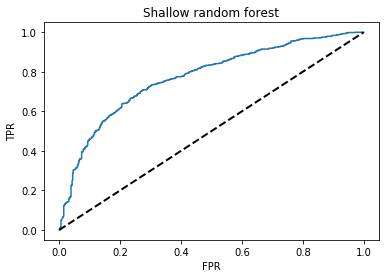

In [22]:
srfc_fpr, srfc_tpr, _ = roc_curve(y_test, srfc_predict_proba)
plt.plot(srfc_fpr, srfc_tpr)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Shallow random forest')
plt.show()

### Plots for deep random forest

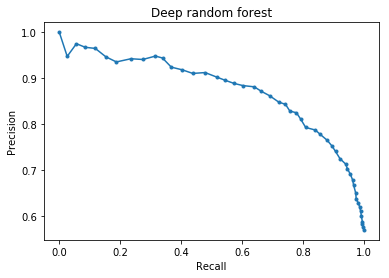

In [23]:
drfc_prec_curve, drfc_rec_curve, _ = precision_recall_curve(y_test, drfc_predict_proba)
plt.plot(drfc_rec_curve, drfc_prec_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Deep random forest')
plt.show()

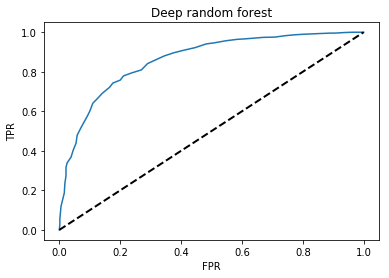

In [24]:
drfc_fpr, drfc_tpr, _ = roc_curve(y_test, drfc_predict_proba)
plt.plot(drfc_fpr, drfc_tpr)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Deep random forest')
plt.show()

# Task 4

### Grid search for shallow decision tree

In [25]:
sdtc_param_grid = {'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy'],
                   'max_features': [i for i in range(1, 10)] + [None]}

sdtc_gs = GridSearchCV(sdtc, sdtc_param_grid, cv = 3, scoring='recall', verbose = 0)

In [26]:
sdtc_gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [27]:
print(sdtc_rec)
print(sdtc_gs.best_score_)
print(sdtc_gs.best_params_)

0.7647907647907648
0.974921535181572
{'criterion': 'gini', 'max_depth': 2, 'max_features': 3}


### Grid search for shallow random forest

In [28]:
srfc_param_grid = {'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy'],
                   'max_features': [i for i in range(1, 10)] + ['auto'], 'n_estimators': [50, 100]}

srfc_gs = GridSearchCV(srfc, srfc_param_grid, cv = 3, scoring='recall', verbose = 0)

In [29]:
srfc_gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'auto'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [30]:
print(srfc_rec)
print(srfc_gs.best_score_)
print(srfc_gs.best_params_)

0.7748917748917749
0.9995084889850416
{'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'n_estimators': 50}


### Grid search for deep decision tree

In [31]:
ddtc_param_grid = {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': [i for i in range(3, 10)],
                   'max_features': [i for i in range(1, 10)] + ['auto']}

ddtc_gs = GridSearchCV(ddtc, ddtc_param_grid, cv = 3, scoring='recall', verbose = 0)

In [32]:
ddtc_gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [33]:
print(ddtc_rec)
print(ddtc_gs.best_score_)
print(ddtc_gs.best_params_)

0.7012987012987013
0.8662673237972331
{'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 7}


### Grid search for deep random forest

In [34]:
drfc_param_grid = {'criterion': ['gini', 'entropy'],
                   'max_features': [i for i in range(1, 10)] + ['auto'], 
                   'n_estimators': [50, 100],
                   'min_samples_leaf': [i for i in range(3, 10)]}

drfc_gs = GridSearchCV(drfc, drfc_param_grid, cv = 3, scoring='recall', verbose = 0)

In [35]:
drfc_gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'auto'], 'n_estimators': [50, 100], 'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [36]:
print(drfc_rec)
print(drfc_gs.best_score_)
print(drfc_gs.best_params_)

0.7792207792207793
0.9882021628057494
{'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 9, 'n_estimators': 100}
